In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
missing_values = ["n/a", "na", "--", "NaN", "", "A"]
df = pd.read_csv("AcademicPerformance.csv", na_values=missing_values)

In [32]:
print(f"\nInitial Dimensions: {df.shape}")
print("\nFirst 5 Rows:")
print(df.head())


Initial Dimensions: (2240, 11)

First 5 Rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  Year_Birth  math score  reading score  \
0                    none      1970.0        72.0           72.0   
1               completed      1961.0         NaN            NaN   
2                    none      1958.0        90.0           95.0   
3                    none      1967.0         NaN            NaN   
4                    none      1989.0        76.0           78.0   

   writing score Dt_Admission College_Fees  
0           74.0      6/16/14  $84,835.00   
1            NaN      6/15/14  $5

In [33]:
print(df.isnull().sum())

gender                         1240
race/ethnicity                 1240
parental level of education    1240
lunch                          1240
test preparation course        1240
Year_Birth                     1240
math score                     1242
reading score                  1242
writing score                  1241
Dt_Admission                   1240
College_Fees                   1245
dtype: int64


In [34]:
initial_count = len(df)
df = df.dropna(how='any')
dropped_count = initial_count - len(df)

print(f"\nDropped {dropped_count} rows with null values")
print(f"\nRemaining Data Dimensions: {df.shape}")
print("\nMissing Values After Dropping:")
print(df.isnull().sum())


Dropped 1247 rows with null values

Remaining Data Dimensions: (993, 11)

Missing Values After Dropping:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
Year_Birth                     0
math score                     0
reading score                  0
writing score                  0
Dt_Admission                   0
College_Fees                   0
dtype: int64


<Axes: >

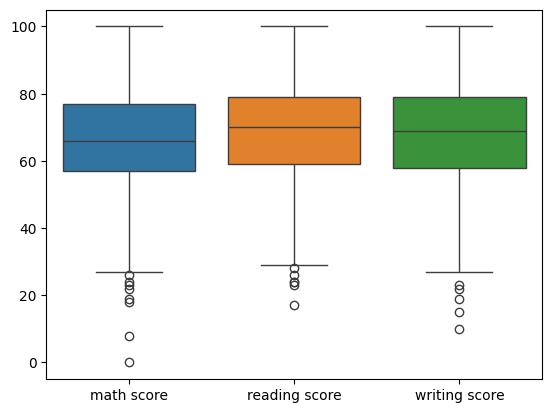

In [35]:
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])

In [36]:
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

for col in ['math score', 'reading score', 'writing score']:
    df = treat_outliers(df, col)

<Axes: >

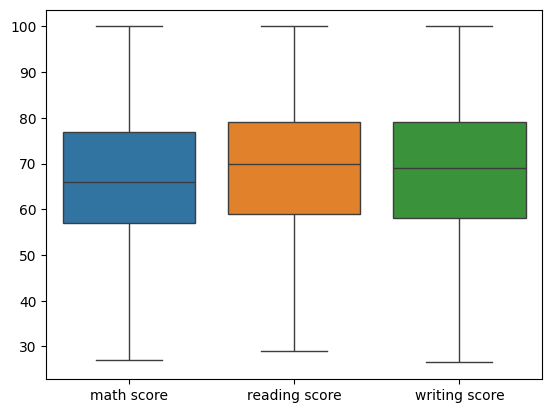

In [37]:
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])

In [38]:
df['College_Fees'] = df['College_Fees'].str.replace('$', '').str.replace(',', '').astype(float)
df['College_Fees'] = df['College_Fees'].apply(lambda x: round(x/100000, 2))

In [39]:
print(df['College_Fees'])

0      0.85
2      0.67
4      0.21
5      0.72
6      0.64
       ... 
995    0.57
996    0.76
997    0.76
998    0.51
999    0.44
Name: College_Fees, Length: 993, dtype: float64
